In [1]:
# In this assignment students need to predict whether a person makes over
# 50K per year or not from classic adult dataset using XGBoost. The
# description of the dataset is as follows:
# Data Set Information:
# Extraction was done by Barry Becker from the 1994 Census
# database. A set of reasonably clean records was extracted using the
# following conditions: ((AAGE>16) && (AGI>100) &&
# (AFNLWGT>1)&& (HRSWK>0))

# Attribute Information:
# Listing of attributes: >50K, <=50K.
# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
# Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
# Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
# Doctorate, 5th-6th, Preschool.
# education-num: continuous.

# marital-status: Married-civ-spouse, Divorced, Never-married,
# Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-
# managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,

# Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
# Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
# Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico,
# Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
# Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
# Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
# Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,

# Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
# Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# Following is the code to load required libraries and data:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, 
                       header = None)

In [2]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [5]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [7]:
train_set['wage_class'].value_counts().keys()

Index([' <=50K', ' >50K'], dtype='object')

In [8]:
test_set['wage_class'].value_counts().keys()

Index([' <=50K.', ' >50K.'], dtype='object')

In [9]:
# Replacing Target class with Binary variables
train_set['wage_class'] = train_set['wage_class'].apply(lambda x: 0 if x == ' <=50K' else 1)
test_set['wage_class'] = test_set['wage_class'].apply(lambda x: 0 if x == ' <=50K.' else 1)

In [10]:
# Replacing the categorical variable
for col in train_set.select_dtypes(include=[object]).columns:
    
    # Replacing category columns for train
    cat_to_num = dict(train_set[col].value_counts()/len(train_set))
    train_set[col] = train_set[col].replace(cat_to_num)
    
    # Replacing category columns for test
    test_set[col] = test_set[col].replace(cat_to_num)
    

In [11]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0.039864,77516,0.164461,13,0.328092,0.115783,0.255060,0.854274,0.669205,2174,0,40,0.895857,0
1,50,0.078038,83311,0.164461,13,0.459937,0.124873,0.405178,0.854274,0.669205,0,0,13,0.895857,0
2,38,0.697030,215646,0.322502,9,0.136452,0.042075,0.255060,0.854274,0.669205,0,0,40,0.895857,0
3,53,0.697030,234721,0.036086,7,0.459937,0.042075,0.405178,0.095943,0.669205,0,0,40,0.895857,0
4,28,0.697030,338409,0.164461,13,0.459937,0.127146,0.048156,0.095943,0.330795,0,0,40,0.002918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.697030,257302,0.032769,12,0.459937,0.028500,0.048156,0.854274,0.330795,0,0,38,0.895857,0
32557,40,0.697030,154374,0.322502,9,0.459937,0.061485,0.405178,0.854274,0.669205,0,0,40,0.895857,1
32558,58,0.697030,151910,0.322502,9,0.030497,0.115783,0.105832,0.854274,0.330795,0,0,40,0.895857,0
32559,22,0.697030,201490,0.322502,9,0.328092,0.115783,0.155646,0.854274,0.669205,0,0,20,0.895857,0


In [12]:
test_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,0.697030,226802,0.036086,7,0.328092,0.061485,0.155646,0.095943,0.669205,0,0,40,0.895857,0
1,38,0.697030,89814,0.322502,9,0.459937,0.030527,0.405178,0.854274,0.669205,0,0,50,0.895857,0
2,28,0.064279,336951,0.032769,12,0.459937,0.019932,0.405178,0.854274,0.669205,0,0,40,0.895857,1
3,44,0.697030,160323,0.223918,10,0.459937,0.061485,0.405178,0.095943,0.669205,7688,0,40,0.895857,1
4,18,0.056386,103497,0.223918,10,0.328092,0.056601,0.155646,0.854274,0.330795,0,0,30,0.895857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,0.697030,215419,0.164461,13,0.136452,0.127146,0.255060,0.854274,0.330795,0,0,36,0.895857,0
16277,64,0.056386,321403,0.322502,9,0.030497,0.056601,0.030128,0.095943,0.669205,0,0,40,0.895857,0
16278,38,0.697030,374983,0.164461,13,0.459937,0.127146,0.405178,0.854274,0.669205,0,0,50,0.895857,0
16279,44,0.697030,83891,0.164461,13,0.136452,0.115783,0.155646,0.031909,0.669205,5455,0,40,0.895857,0


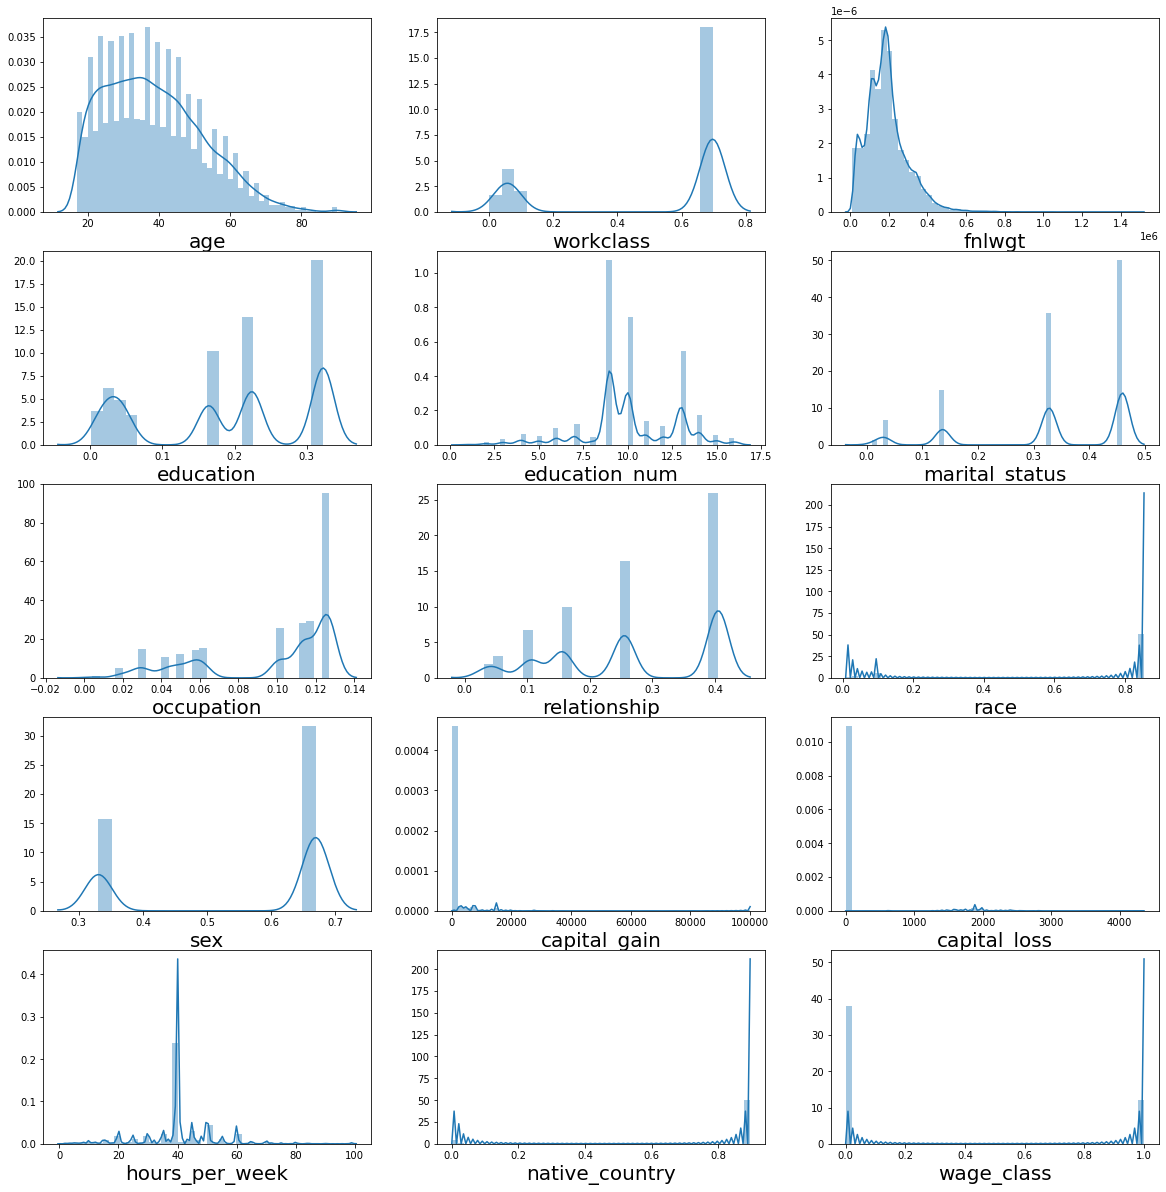

In [13]:
# let's see how box plot for the data for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train_set.columns:
    if plotnumber<=18 :   
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(train_set[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [14]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0.039864,77516,0.164461,13,0.328092,0.115783,0.255060,0.854274,0.669205,2174,0,40,0.895857,0
1,50,0.078038,83311,0.164461,13,0.459937,0.124873,0.405178,0.854274,0.669205,0,0,13,0.895857,0
2,38,0.697030,215646,0.322502,9,0.136452,0.042075,0.255060,0.854274,0.669205,0,0,40,0.895857,0
3,53,0.697030,234721,0.036086,7,0.459937,0.042075,0.405178,0.095943,0.669205,0,0,40,0.895857,0
4,28,0.697030,338409,0.164461,13,0.459937,0.127146,0.048156,0.095943,0.330795,0,0,40,0.002918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.697030,257302,0.032769,12,0.459937,0.028500,0.048156,0.854274,0.330795,0,0,38,0.895857,0
32557,40,0.697030,154374,0.322502,9,0.459937,0.061485,0.405178,0.854274,0.669205,0,0,40,0.895857,1
32558,58,0.697030,151910,0.322502,9,0.030497,0.115783,0.105832,0.854274,0.330795,0,0,40,0.895857,0
32559,22,0.697030,201490,0.322502,9,0.328092,0.115783,0.155646,0.854274,0.669205,0,0,20,0.895857,0


In [15]:
X_train = train_set.drop(['wage_class'], axis=1)
y_train = train_set['wage_class']

X_test = test_set.drop(['wage_class'], axis=1)
y_test = test_set['wage_class']

train_set.drop(['wage_class'], axis=1, inplace=True)
test_set.drop(['wage_class'], axis=1, inplace=True)

In [16]:
sd = StandardScaler()
sd.fit(X_train)
X_train_sd = sd.transform(X_train)
X_test_sd = sd.transform(X_test)

In [17]:
tuned_parameters = [{ 'learning_rate':[0.01,0.001],
                        'max_depth': [3,5,10],
                        'n_estimators':[10,50,100,200]
                    }
                   ]

In [18]:
# Using GridSearchCV
model = GridSearchCV(XGBClassifier(), tuned_parameters,
                     scoring = 'accuracy', cv=5,n_jobs=3, verbose=3)
model.fit(X_train_sd, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:  8.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=3,
             param_grid=[{'learning_rate': [0.01, 0.001],
                          'max_depth': [3, 5, 10],
                          'n_estimators': [10, 50, 100, 200]}

In [19]:
model.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}

In [20]:
xgb = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.01)
xgb.fit(X_train_sd, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
xgb.score(X_train_sd, y_train)

0.8825896010564787

In [22]:
xgb.score(X_test_sd, y_test)

0.8668386462747989

In [23]:
y_pred = xgb.predict(X_test_sd)

In [24]:
def Rates(tn,fp,fn,tp):
    TPR=float(tp/(tp+fn))
    TNR=float(tn/(tn+fp))
    FPR=float(fp/(tn+fp))
    FNR=float(fn/(tp+fn))
    print("True Positive Rate or Sensitivity = %f" %(TPR*100))
    print("True Negative Rate or Specificity = %f" %(TNR*100))
    print("False Positive Rate or Fall-out = %f" %(FPR*100))
    print("False Negative Rate or Missclassification rate = %f" %(FNR*100))

In [25]:
tn, fp, fn, tp =confusion_matrix(y_test, y_pred).ravel()
Rates(tn,fp,fn,tp)

True Positive Rate or Sensitivity = 61.154446
True Negative Rate or Specificity = 94.579815
False Positive Rate or Fall-out = 5.420185
False Negative Rate or Missclassification rate = 38.845554


Text(26.5, 0.5, 'True Value')

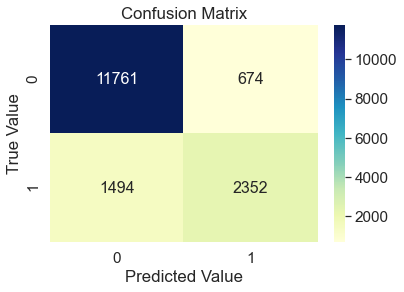

In [26]:
x=confusion_matrix(y_test, y_pred)
cm_df=pd.DataFrame(x,index=[0,1],columns=[0,1])

sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")